In [1]:
from google.colab import files
from PIL import Image

uploaded = files.upload()

Saving imdb_top_1000.csv to imdb_top_1000.csv


In [6]:
import pandas as pd 
df=pd.read_csv('imdb_top_1000.csv', encoding='utf8')
df['Runtime']=df['Runtime'].str.replace('min','') #remove column
df = df.dropna(subset=["Runtime"]) #dropnNaN because was affecting conversion to int
df['Runtime'] = df['Runtime'].astype(int) #convert to int
df.sort_values(["Released_Year"], 
                    axis=0,
                    ascending=[True], 
                    inplace=True)
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
321,https://m.media-amazon.com/images/M/MV5BNWJiNG...,Das Cabinet des Dr. Caligari,1920,NaN,76,"Fantasy, Horror, Mystery",8.1,"Hypnotist Dr. Caligari uses a somnambulist, Ce...",NaN,Robert Wiene,Werner Krauss,Conrad Veidt,Friedrich Feher,Lil Dagover,57428,NaN
127,https://m.media-amazon.com/images/M/MV5BZjhhMT...,The Kid,1921,Passed,68,"Comedy, Drama, Family",8.3,"The Tramp cares for an abandoned child, but ev...",NaN,Charles Chaplin,Charles Chaplin,Edna Purviance,Jackie Coogan,Carl Miller,113314,"5,450,000"
568,https://m.media-amazon.com/images/M/MV5BMTAxYj...,Nosferatu,1922,NaN,94,"Fantasy, Horror",7.9,Vampire Count Orlok expresses interest in a ne...,NaN,F.W. Murnau,Max Schreck,Alexander Granach,Gustav von Wangenheim,Greta Schröder,88794,NaN
194,https://m.media-amazon.com/images/M/MV5BZWFhOG...,Sherlock Jr.,1924,Passed,45,"Action, Comedy, Romance",8.2,"A film projectionist longs to be a detective, ...",NaN,Buster Keaton,Buster Keaton,Kathryn McGuire,Joe Keaton,Erwin Connelly,41985,"977,375"
193,https://m.media-amazon.com/images/M/MV5BZjEyOT...,The Gold Rush,1925,Passed,95,"Adventure, Comedy, Drama",8.2,A prospector goes to the Klondike in search of...,NaN,Charles Chaplin,Charles Chaplin,Mack Swain,Tom Murray,Henry Bergman,101053,"5,450,000"


In [7]:
df['AVG_Runtime'] = df.groupby('Released_Year').Runtime.transform('mean')
df.head(8)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,AVG_Runtime
321,https://m.media-amazon.com/images/M/MV5BNWJiNG...,Das Cabinet des Dr. Caligari,1920,NaN,76,"Fantasy, Horror, Mystery",8.1,"Hypnotist Dr. Caligari uses a somnambulist, Ce...",NaN,Robert Wiene,Werner Krauss,Conrad Veidt,Friedrich Feher,Lil Dagover,57428,NaN,76.0
127,https://m.media-amazon.com/images/M/MV5BZjhhMT...,The Kid,1921,Passed,68,"Comedy, Drama, Family",8.3,"The Tramp cares for an abandoned child, but ev...",NaN,Charles Chaplin,Charles Chaplin,Edna Purviance,Jackie Coogan,Carl Miller,113314,"5,450,000",68.0
568,https://m.media-amazon.com/images/M/MV5BMTAxYj...,Nosferatu,1922,NaN,94,"Fantasy, Horror",7.9,Vampire Count Orlok expresses interest in a ne...,NaN,F.W. Murnau,Max Schreck,Alexander Granach,Gustav von Wangenheim,Greta Schröder,88794,NaN,94.0
194,https://m.media-amazon.com/images/M/MV5BZWFhOG...,Sherlock Jr.,1924,Passed,45,"Action, Comedy, Romance",8.2,"A film projectionist longs to be a detective, ...",NaN,Buster Keaton,Buster Keaton,Kathryn McGuire,Joe Keaton,Erwin Connelly,41985,"977,375",45.0
193,https://m.media-amazon.com/images/M/MV5BZjEyOT...,The Gold Rush,1925,Passed,95,"Adventure, Comedy, Drama",8.2,A prospector goes to the Klondike in search of...,NaN,Charles Chaplin,Charles Chaplin,Mack Swain,Tom Murray,Henry Bergman,101053,"5,450,000",85.0
462,https://m.media-amazon.com/images/M/MV5BMTEyMT...,Bronenosets Potemkin,1925,NaN,75,"Drama, History, Thriller",8.0,In the midst of the Russian Revolution of 1905...,97.0,Sergei M. Eisenstein,Aleksandr Antonov,Vladimir Barskiy,Grigoriy Aleksandrov,Ivan Bobrov,53054,"50,970",85.0
320,https://m.media-amazon.com/images/M/MV5BYmRiMD...,The General,1926,Passed,67,"Action, Adventure, Comedy",8.1,When Union spies steal an engineer's beloved l...,NaN,Clyde Bruckman,Buster Keaton,Buster Keaton,Marion Mack,Glen Cavender,81156,"1,033,895",67.0
126,https://m.media-amazon.com/images/M/MV5BMTg5YW...,Metropolis,1927,NaN,153,"Drama, Sci-Fi",8.3,In a futuristic city sharply divided between t...,98.0,Fritz Lang,Brigitte Helm,Alfred Abel,Gustav Fröhlich,Rudolf Klein-Rogge,159992,"1,236,166",123.5


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

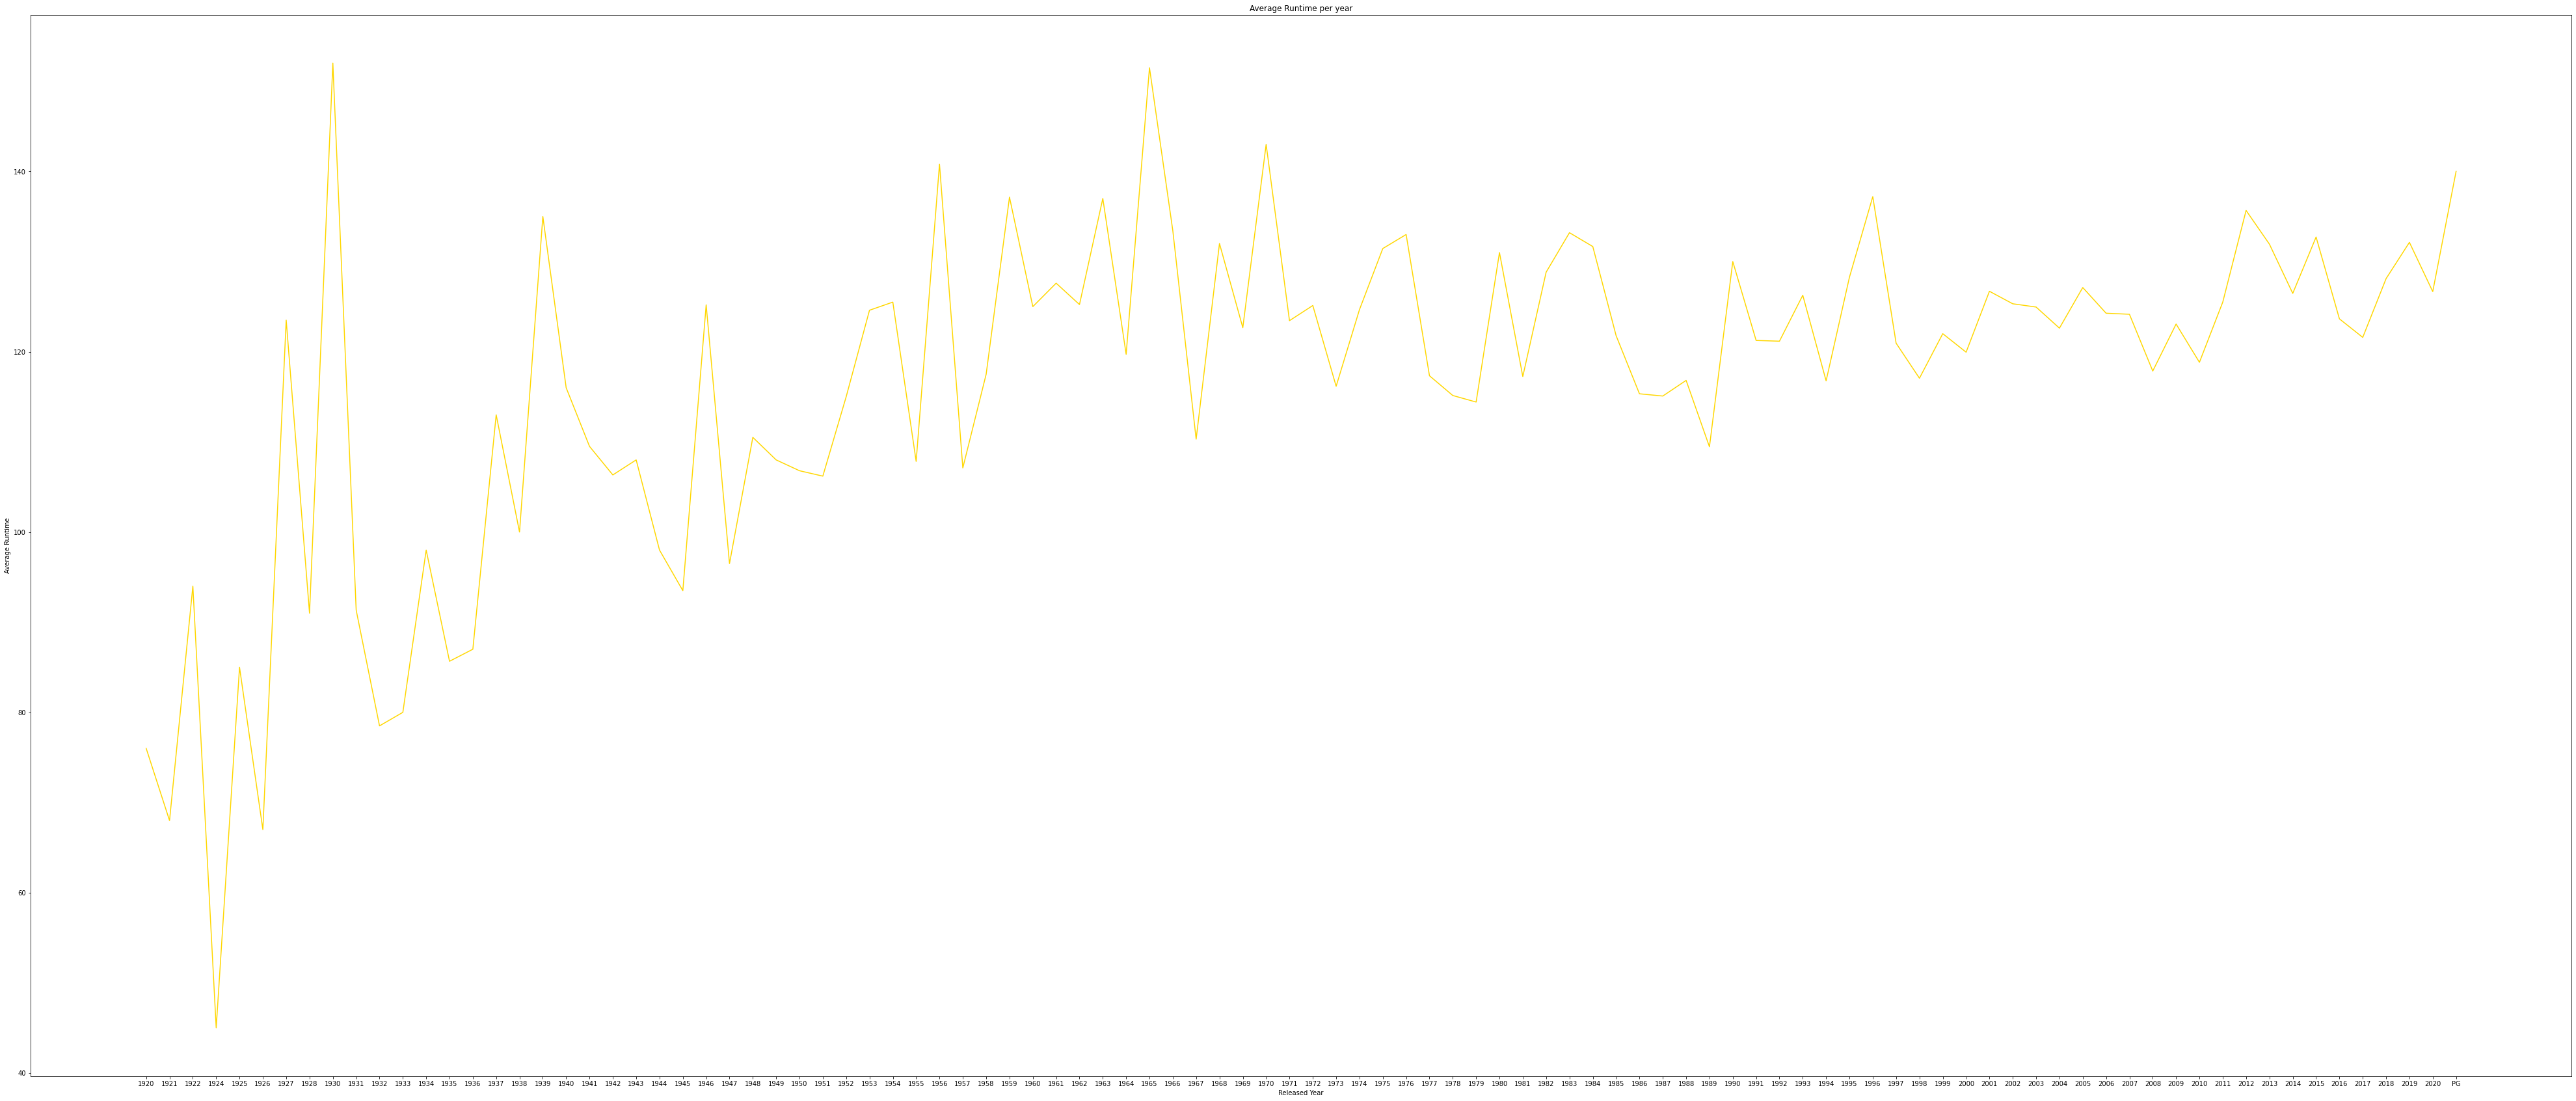

In [9]:
fig, ax = plt.subplots(figsize=(70,30))
ax.plot(df["Released_Year"], df["AVG_Runtime"], color="gold")
plt.title("Average Runtime per year") 
plt.xlabel("Released Year")
plt.ylabel("Average Runtime") 
plt.show()